# Check outputs

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [2]:
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym'

In [3]:
!ls {path}

actlyr_annually.nc	    ftablemax_monthly.nc       npp_monthly.nc
actlyrmax_annually.nc	    ftablemin_annually.nc      pr_annually.nc
actlyrmax_monthly.nc	    ftablemin_monthly.nc       pr_monthly.nc
actlyrmin_annually.nc	    ftable_monthly.nc	       ra_annually.nc
actlyrmin_monthly.nc	    fVegLitter_annually.nc     ra_monthly.nc
actlyr_monthly.nc	    fVegLitter_monthly.nc      rh_annually.nc
albs_annually.nc	    gpp_annually.nc	       rh_monthly.nc
albs_monthly.nc		    gpp_monthly.nc	       rls_annually.nc
albsn_monthly.nc	    hfg_monthly.nc	       rls_monthly.nc
cLand_annually.nc	    hfls_annually.nc	       rmLeaf_monthly.nc
cLeaf_annually.nc	    hfls_monthly.nc	       rmrveg_annually.nc
cLeaf_monthly.nc	    hfss_annually.nc	       rsds_monthly.nc
cRoot_annually.nc	    hfss_monthly.nc	       rSoil_monthly.nc
cRoot_monthly.nc	    lai_annually.nc	       rss_annually.nc
cSoil_annually.nc	    lai_monthly.nc	       rss_monthly.nc
cSoil_monthly.nc	    landCoverFrac_annually.nc  sftlf.nc
cSt

As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [4]:
freq = 'annually'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
# snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
# snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

In [87]:
cSoil.long_name

'Carbon mass in the full depth of the soil model.'

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Text(0.5, 0.98, 'Spinup Col de Porte (1995-2013) / metLoop = 10; spinfast = 2')

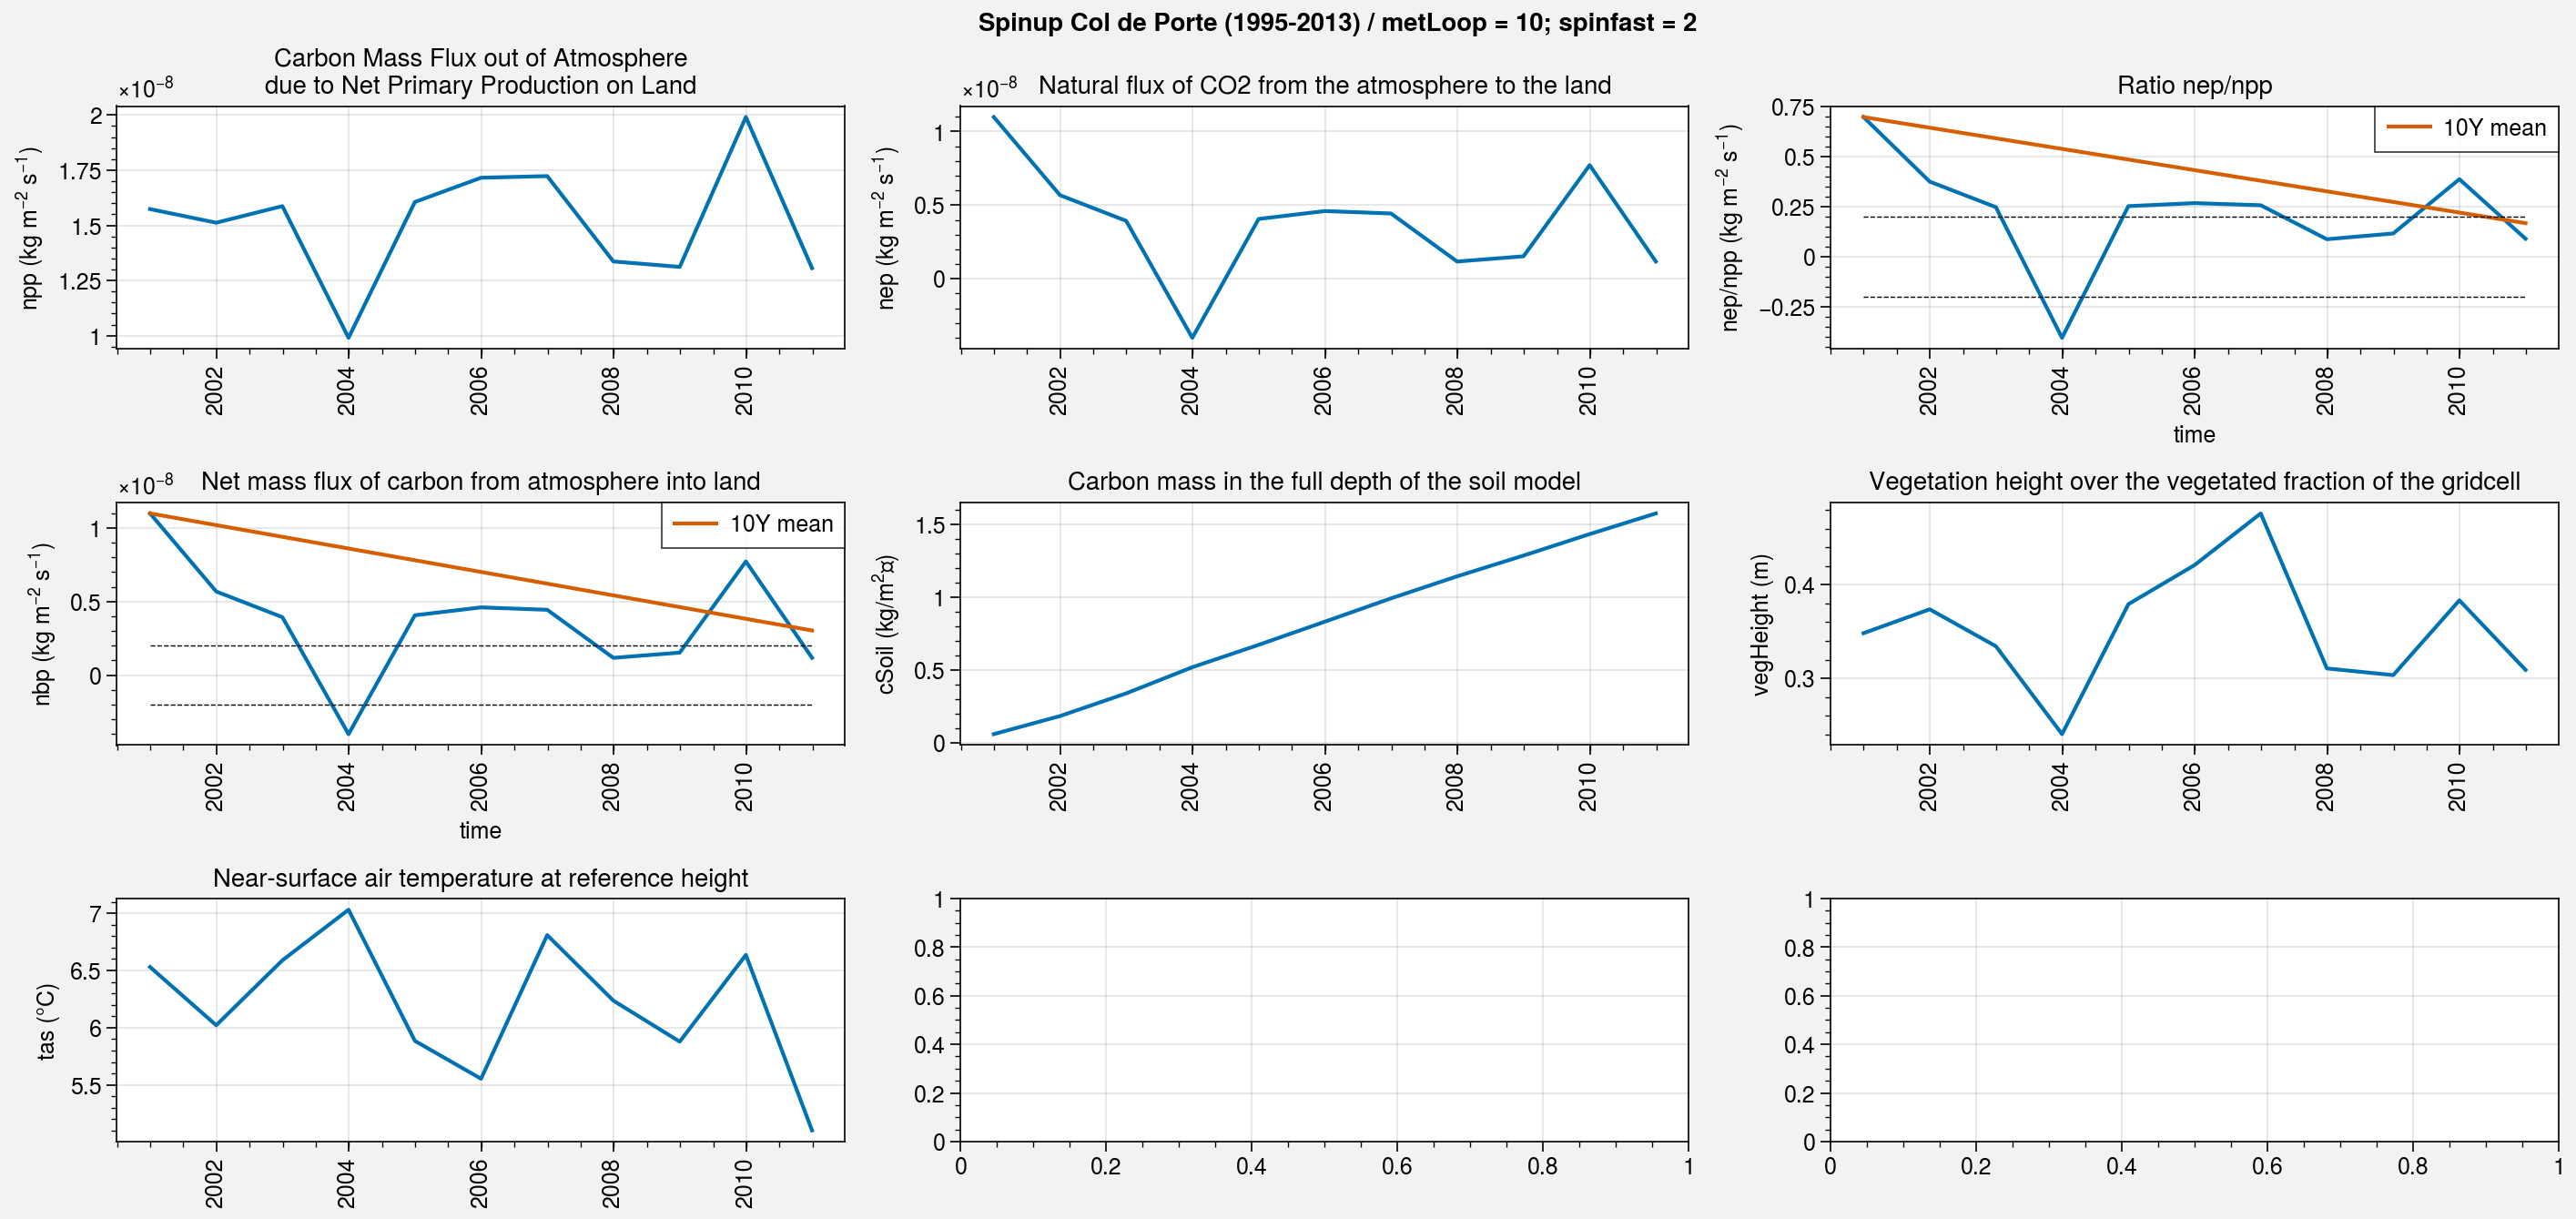

In [5]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# vegHeight
axs[5].plot(vegHeight)
axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

fig.suptitle('Spinup Col de Porte (1995-2013) / metLoop = 10; spinfast = 2')

## Monthly

In [7]:
freq = 'monthly'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
# snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
# snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
# vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

In [8]:
cSoil.long_name

'Carbon mass in the full depth of the soil model.'

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Text(0.5, 0.98, 'Spinup Col de Porte (1995-2013) / metLoop = 10; spinfast = 2')

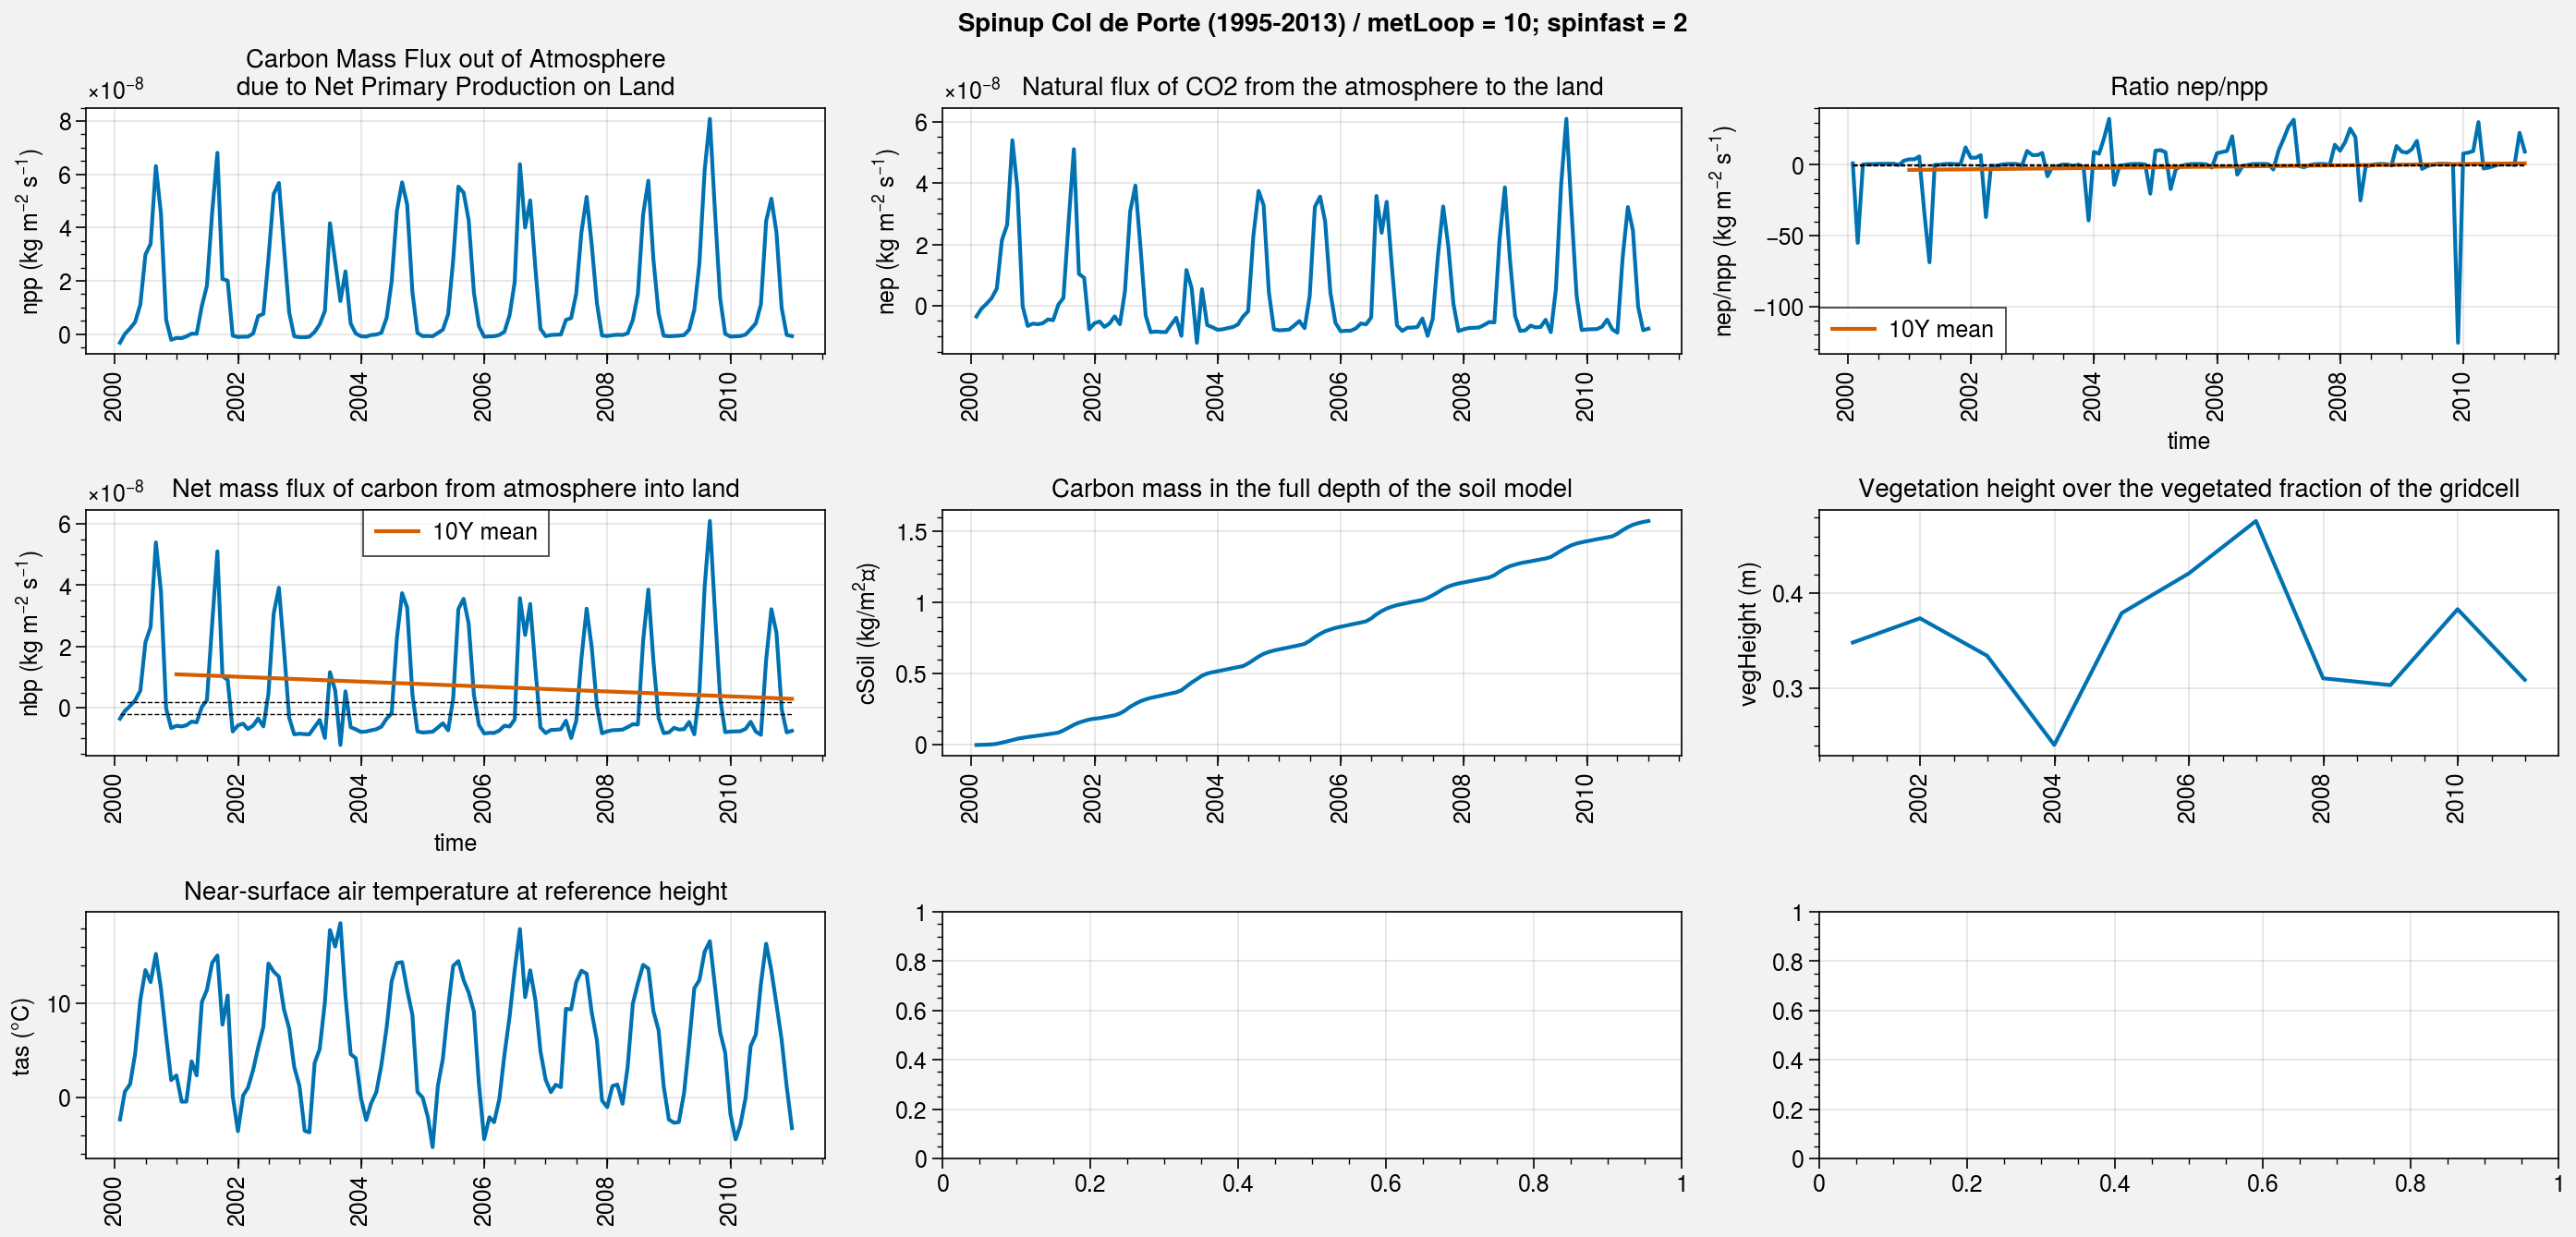

In [9]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# vegHeight
axs[5].plot(vegHeight)
axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

fig.suptitle('Spinup Col de Porte (1995-2013) / metLoop = 10; spinfast = 2')

In [13]:
!ls {path}/*monthly.nc

/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/actlyrmax_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/actlyrmin_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/actlyr_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/albs_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/albsn_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/cLeaf_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/cRoot_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/cSoil_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/cStem_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/cVeg_monthly.nc
/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_densitym/evspsbl_monthly.nc
/home/laland

In [18]:
freq = 'monthly'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
lai = xr.open_dataset(path+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model
# vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

In [19]:
lai.long_name

'Leaf Area Index'

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Text(0.5, 0.98, 'Spinup Col de Porte (2000-2010)')

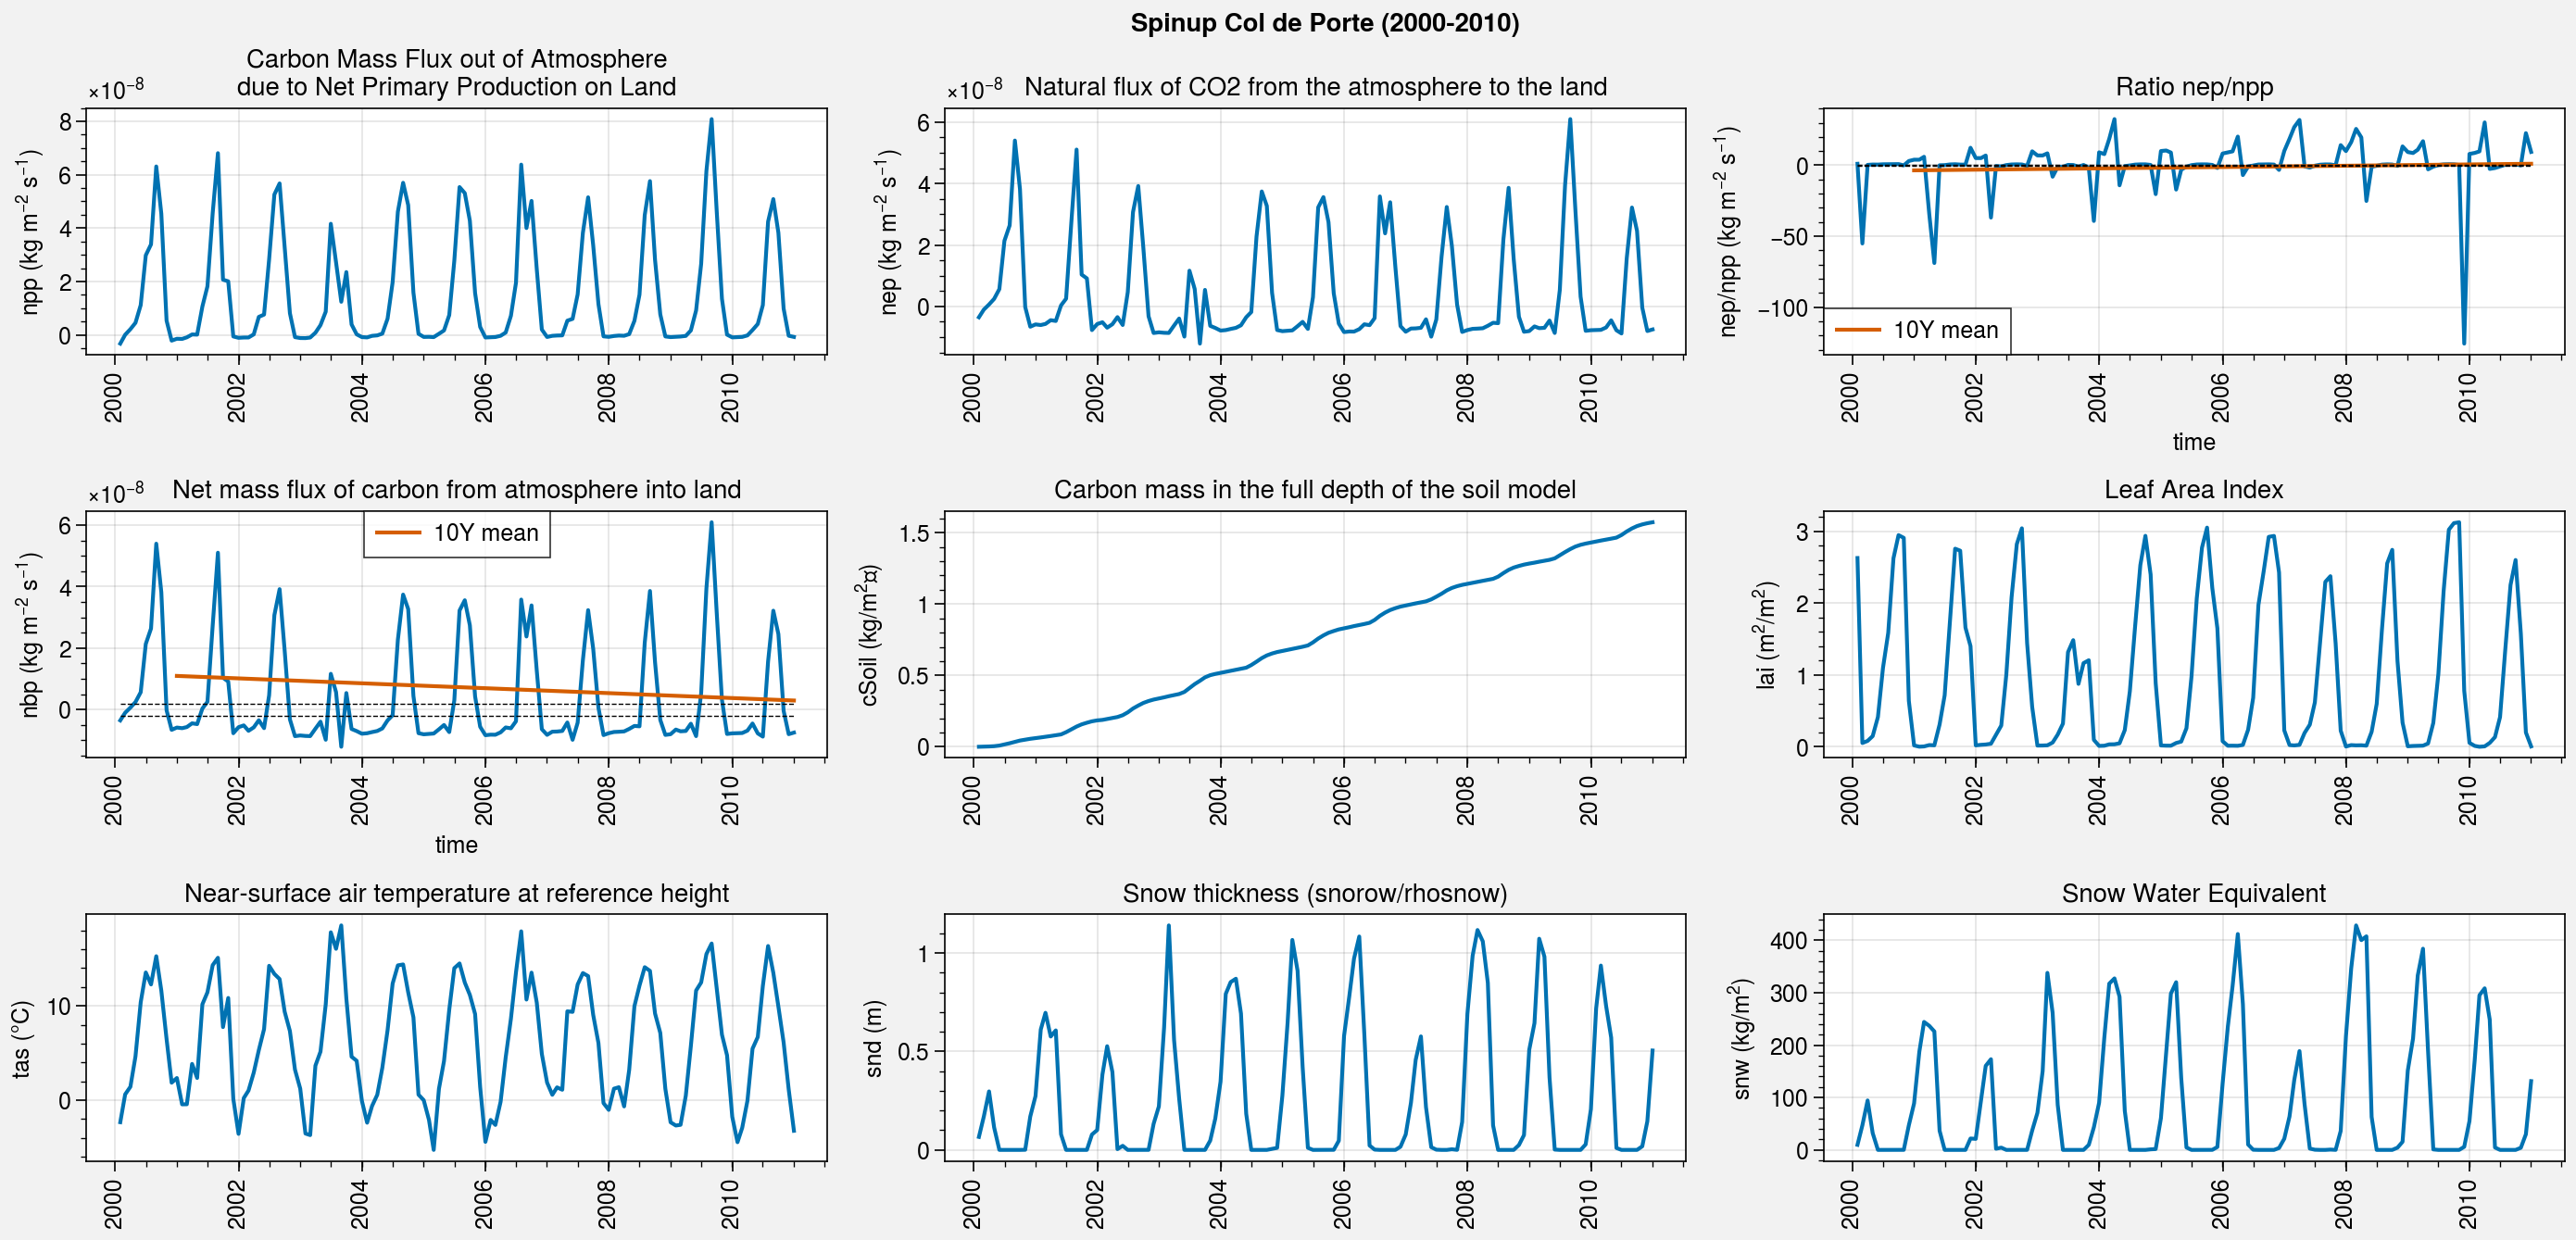

In [21]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# lai
axs[5].plot(lai)
axs[5].format(title=lai.long_name, ylabel='lai ('+lai.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

# snd
axs[7].plot(snd)
axs[7].format(title=snd.long_name, ylabel='snd ('+snd.units+')')

# snw
axs[8].plot(snw)
axs[8].format(title='Snow Water Equivalent', ylabel='snw ('+snw.units+')')

fig.suptitle('Spinup Col de Porte (2000-2010)')